<a href="https://colab.research.google.com/github/hnmelo/MujeresDigitales/blob/main/5)_Patrones_de_consumo_de_energia_Visualizacion_caso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¿Qué patrones existen entre el consumo y la generación de energía?

## Metas 

Al final de este caso, estará aún más familiarizado con el uso de `pandas` y obtendrá experiencia en cómo generar visualizaciones y gráficos. Para estos, usará las bibliotecas `matplotlib` y` seaborn`.

También debe comenzar a desarrollar un sentido de qué gráficos usar para mostrar ciertos tipos de información. Esto le ayudará a redactar mejores informes y a comunicar sus ideas y análisis con mucha más claridad a los profesionales que no se dedican a los datos.

## Introduccion

**Contexto empresarial** La oferta y la demanda de energía es un tema muy debatido en los gobiernos y partidos políticos del mundo. Usted es analista del Departamento de Energía (DoE) y es responsable de discernir patrones en la generación y el consumo de energía eléctrica en diferentes fuentes de energía, así como en todos los sectores de la economía de los EE. UU. Para ayudar a impulsar las iniciativas gubernamentales.

**Problema empresarial** Su jefe desea que responda a la siguiente pregunta: **"Dados los patrones de consumo de energía en todos los sectores y en el tiempo, ¿cómo deberíamos asignar los recursos del gobierno a la generación de electricidad nuclear?"** y generar archivos de gráficos eso hará que le sea lo más fácil posible explicar sus hallazgos a los políticos no técnicos para que puedan asignar los recursos de manera apropiada en todo el país.

**Contexto analítico.** Recibirá datos en formato CSV de la Administración de Información Energética (EIA) para el consumo de energía y la generación neta de electricidad, donde el consumo de energía se desglosa por sector y la generación de electricidad se desglosa por fuente. En este caso, usted: (1) procesará previamente los datos para transformarlos en un formato susceptible de análisis posterior; (2) utilizar la funcionalidad de ploteo simple en Python para explorar las relaciones entre el consumo de energía en el sector de la energía eléctrica y la generación de electricidad a partir de la energía eléctrica nuclear; (3) identificar los patrones de uso y generación de energía y cómo cambian con el tiempo; y finalmente, (4) utilice la funcionalidad de ploteo avanzada para determinar qué sectores consumen más energía y cómo ha evolucionado con el tiempo.

In [1]:
import os
import pandas as pd
import numpy as np

# Mostar los graficos in line
%matplotlib inline

# Paquete basico de visualizacion
import matplotlib.pyplot as plt

# Manejo de fechas
import datetime
import matplotlib.dates as mdates

# Mosatrar la imagen inline
from IPython.display import Image

# Visualizacion mas avanzada 
import seaborn as sns

sns.set(style="whitegrid")  # definir estilo seaborn

## Introducción a los datos de la Administración de información energética (EIA) (10 min)

Los datos de consumo y generación se proporcionan mensualmente en ```data / energy_consumption.csv``` y ```data / electric_generation.csv```. El contenido de los datos y algunas características útiles a tener en cuenta sobre los datos son los siguientes:

### data/energy_consumption.csv
- Contiene el consumo de energía mensual por sector para EE. UU.
- El consumo de energía es el uso de energía como fuente de calor o energía o como insumo en el proceso de fabricación.
- La energía primaria se contabiliza primero como energía en un balance energético estadístico, antes de cualquier transformación a formas de energía secundaria o terciaria.
- El consumo total de energía en los sectores consiste en el consumo de energía primaria, las ventas minoristas de electricidad y las pérdidas de energía del sistema eléctrico.

### data/electricity_generation.csv
- Contiene generación de electricidad neta mensual para todos los sectores en los EE. UU.
- La generación neta de electricidad es la cantidad de generación bruta de electricidad menos el uso de la estación (la energía eléctrica consumida en la (s) estación (es) generadora (s) para el servicio de la estación o auxiliares)
- Btu son las siglas de British Thermal Unit

Las columnas de las tablas son:

1. **MSN:** Nombres de series nemotécnicas (consulte https://www.eia.gov/state/seds/sep_use/notes/use_a.pdf para obtener más información)
2. **AAAAMM:** El mes del uso de energía
3. **Value:** La cantidad de energía consumida / generada
4. **Column_Order:** El orden de las columnas utilizadas en los informes oficiales de EIA
5. **Descripción:** La descripción de qué sector consumió / generó la electricidad
6. **Unidad:** La unidad de energía utilizada para el valor

(Fuente: https://www.eia.gov/totalenergy/data/monthly/pdf/sec13.pdf)

Comencemos cargando los datos en Python:

In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

KeyboardInterrupt: ignored

In [ ]:
%cd '/content/gdrive/MyDrive/Bootcamp SENA 2021/Semana 5/'

/content/gdrive/MyDrive/Bootcamp SENA 2021/Semana 5


La columna ```Description``` proporciona una descripción del sector (consumo de energía) o de la fuente (generación de electricidad). Veamos todos los valores de descripción disponibles para cada conjunto de datos para comprender qué datos están disponibles.

In [3]:
energy_df = pd.read_csv('energy_consumption.csv')
electricity_df = pd.read_csv('electricity_generation.csv')

In [4]:
energy_df.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,TXRCBUS,194913,4460.588,1,Primary Energy Consumed by the Residential Sector,Trillion Btu
1,TXRCBUS,195013,4829.528,1,Primary Energy Consumed by the Residential Sector,Trillion Btu
2,TXRCBUS,195113,5104.680,1,Primary Energy Consumed by the Residential Sector,Trillion Btu
3,TXRCBUS,195213,5158.406,1,Primary Energy Consumed by the Residential Sector,Trillion Btu
4,TXRCBUS,195313,5052.749,1,Primary Energy Consumed by the Residential Sector,Trillion Btu


In [ ]:
energy_df.shape

(6952, 6)

In [ ]:
print(energy_df["Description"].unique())

['Primary Energy Consumed by the Residential Sector'
 'Total Energy Consumed by the Residential Sector'
 'Primary Energy Consumed by the Commercial Sector'
 'Total Energy Consumed by the Commercial Sector'
 'Primary Energy Consumed by the Industrial Sector'
 'Total Energy Consumed by the Industrial Sector'
 'Primary Energy Consumed by the Transportation Sector'
 'Total Energy Consumed by the Transportation Sector'
 'Primary Energy Consumed by the Electric Power Sector'
 'Energy Consumption Balancing Item' 'Primary Energy Consumption Total']


In [6]:
electricity_df.head()
energy_df['Value'] + 5

0       4465.588
1       4834.528
2       5109.680
3       5163.406
4       5057.749
          ...   
6947    7907.331
6948    8570.414
6949    8551.380
6950    7866.551
6951    7981.769
Name: Value, Length: 6952, dtype: float64

In [13]:
def sum(row):
  if row['Column_Order'] < 6:
    return row['Value'] + 5
  else: 
    return row['Value'] + 10

energy_df['Suma'] = energy_df.apply(sum, axis = 1)
energy_df.head(10)

,MSN,YYYYMM,Value,Column_Order,Description,Unit,Suma
0,TXRCBUS,194913,4460.588,1,Primary Energy Consumed by the Residential Sector,Trillion Btu,4465.588
1,TXRCBUS,195013,4829.528,1,Primary Energy Consumed by the Residential Sector,Trillion Btu,4834.528
2,TXRCBUS,195113,5104.680,1,Primary Energy Consumed by the Residential Sector,Trillion Btu,5109.680
3,TXRCBUS,195213,5158.406,1,Primary Energy Consumed by the Residential Sector,Trillion Btu,5163.406
4,TXRCBUS,195313,5052.749,1,Primary Energy Consumed by the Residential Sector,Trillion Btu,5057.749
5,TXRCBUS,195413,5262.555,1,Primary Energy Consumed by the Residential Sector,Trillion Btu,5267.555
6,TXRCBUS,195513,5608.073,1,Primary Energy Consumed by the Residential Sector,Trillion Btu,5613.073
7,TXRCBUS,195613,5839.664,1,Primary Energy Consumed by the Residential Sector,Trillion Btu,5844.664
8,TXRCBUS,195713,5744.189,1,Primary Energy Consumed by the Residential Sector,Trillion Btu,5749.189
9,TXRCBUS,195813,6125.681,1,Primary Energy Consumed by the Residential Sector,Trillion Btu,6130.681


In [ ]:
energy_df.iloc[:2,:].apply(sum, axis = 1)

In [ ]:
electricity_df.shape

(8216, 6)

In [ ]:
print(electricity_df["Description"].unique())

['Electricity Net Generation From Coal, All Sectors'
 'Electricity Net Generation From Petroleum, All Sectors'
 'Electricity Net Generation From Natural Gas, All Sectors'
 'Electricity Net Generation From Other Gases, All Sectors'
 'Electricity Net Generation From Nuclear Electric Power, All Sectors'
 'Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors'
 'Electricity Net Generation From Conventional Hydroelectric Power, All Sectors'
 'Electricity Net Generation From Wood, All Sectors'
 'Electricity Net Generation From Waste, All Sectors'
 'Electricity Net Generation From Geothermal, All Sectors'
 'Electricity Net Generation From Solar, All Sectors'
 'Electricity Net Generation From Wind, All Sectors'
 'Electricity Net Generation Total (including from sources not shown), All Sectors']


Aquí vemos que tenemos una variedad de sectores de consumo de energía, así como una variedad de fuentes de generación de energía para cada sector. Estamos específicamente interesados en la generación de energía eléctrica nuclear y el consumo de energía eléctrica, ya que el Departamento de Energía está considerando proyectos de energía nuclear.

## Preprocesamiento de datos para simplificar el análisis en el futuro 

En el mundo real, a menudo no nos damos el lujo de tratar con datos perfectamente limpios y formateados. Por lo tanto, necesitaremos realizar algunas operaciones en los datos proporcionados para obtener un formato que se pueda analizar más a fondo.

Por ejemplo, la columna ```Value``` es un valor numérico, pero actualmente está en formato de cadena, lo que dificulta la realización de operaciones matemáticas. Esto se debe a que a esta columna le faltan algunos valores, que se registran como "No disponible":

In [ ]:
electricity_df[electricity_df["Value"] == "Not Available"].groupby(
    ["Description"]
).count()

,MSN,YYYYMM,Value,Column_Order,Unit
Description,,,,,
"Electricity Net Generation From Geothermal, All Sectors",11,11,11,11,11
"Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors",245,245,245,245,245
"Electricity Net Generation From Other Gases, All Sectors",232,232,232,232,232
"Electricity Net Generation From Solar, All Sectors",167,167,167,167,167
"Electricity Net Generation From Waste, All Sectors",21,21,21,21,21
"Electricity Net Generation From Wind, All Sectors",154,154,154,154,154


Cambiemos estos valores para que sean numéricos y dejemos los valores "No disponible" como nulos para que podamos eliminarlos. Para hacer esto, usaremos nuevamente **[`.apply ()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)) function**, que recordará toma una función como argumento principal y luego la aplica repetidamente.

Anteriormente simplificamos demasiado el comportamiento de `apply()` y dijimos que operaba en cada elemento en una columna específica (o Serie), y solo lo usamos en una sola columna. Sin embargo, resulta que `apply()` también se puede usar en un DataFrame completo, ya sea fila por fila o columna por columna.

En `pandas`, la "dirección"(en fila o en columna) a la que desea aplicar su función se especifica pasando el parámetro `axis`. Por defecto, `apply()` usará `axis = 0`, y se ejecutará columna por columna. Para hacer que `apply ()` opere fila por fila, necesita especificar `axis = 1` como argumento para` .apply()`.

Por ejemplo, podemos cambiar todos los tipos de cadenas a tipos flotantes en la columna `Value` de la siguiente manera:

In [ ]:
def string_to_float(r):
    return float(r["Value"]) if r["Value"] != "Not Available" else None

energy_df["Value"] = energy_df.apply(string_to_float, axis=1)
electricity_df["Value"] = electricity_df.apply(string_to_float, axis=1)

Cada aplicación de la función `string_to_float` toma` r` como un argumento que es una fila completa del DataFrame. A partir de ahí, extraemos el elemento "Value" de esa fila y lo convertimos en un flotante si es posible, o en `None` si contiene la cadena "No disponible". Esto es equivalente a operar solo en la columna "Value" directamente de la siguiente manera:

In [ ]:
def string_to_float_column(x):
    return float(x) if x != "Not Available" else None

# No necesitamos ```axis=1``` debido a que
# estamos operando en las columnas directamente que son Series:
energy_df["Value"] = energy_df["Value"].apply(string_to_float_column)
electricity_df["Value"] = electricity_df["Value"].apply(string_to_float_column)

Además, como antes, las funciones `lambda` proporcionan una buena forma abreviada si solo desea ejecutar una única función una vez. Cuando tiene funciones relativamente simples que solo se usan una vez, es mejor usar la palabra clave ```lambda``` para que permanezcan anónimas (no vinculadas a un nombre) y quepan en una línea para facilitar la lectura.

El siguiente código es nuevamente funcionalmente equivalente a los dos ejemplos anteriores:

In [ ]:
energy_df["Value"] = energy_df["Value"].apply(
    lambda x: float(x) if x != "Not Available" else None
)
electricity_df["Value"] = electricity_df["Value"].apply(
    lambda x: float(x) if x != "Not Available" else None
)

In [ ]:
electricity_df.isnull().sum()

MSN               0
YYYYMM            0
Value           830
Column_Order      0
Description       0
Unit              0
dtype: int64

In [ ]:
# Eliminar nulos
energy_df = energy_df.dropna()
electricity_df = electricity_df.dropna()

In [ ]:
electricity_df.shape

(7386, 6)

In [ ]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6952 entries, 0 to 6951
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSN           6952 non-null   object 
 1   YYYYMM        6952 non-null   int64  
 2   Value         6952 non-null   float64
 3   Column_Order  6952 non-null   int64  
 4   Description   6952 non-null   object 
 5   Unit          6952 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 380.2+ KB



Otra característica subóptima de los datos proporcionados es que la columna ```YYYYMM``` para el mes y el año es difícil de usar. Usando ```apply ()``` y ```lambda```, escriba el código para crear una nueva columna llamada ```YYYY``` y ```MM``` en ambos Dataframes, donde las nuevas columnas son el año y el mes de la observación como cadenas. Por ejemplo, si el valor de ```YYYYMM``` es 201407, entonces el valor en la nueva columna para el año sería '2014 'y el valor en la nueva columna para el mes sería '07'. Recuerde que puede acceder a los primeros 4 caracteres de alguna cadena ```my_string``` usando ```my_string[:4]```.

In [ ]:
# Extract the month
energy_df["MM"] = energy_df["YYYYMM"].apply(lambda x: int(str(x)[-2:]))
electricity_df["MM"] = electricity_df["YYYYMM"].apply(lambda x: int(str(x)[-2:]))

# Extract the year
energy_df["YYYY"] = energy_df["YYYYMM"].apply(lambda x: int(str(x)[:-2]))
electricity_df["YYYY"] = electricity_df["YYYYMM"].apply(lambda x: int(str(x)[:-2])) # 1960/06/15

In [ ]:
energy_df

,MSN,YYYYMM,Value,Column_Order,Description,Unit,MM,YYYY
0,TXRCBUS,194913,4460.588,1,Primary Energy Consumed by the Residential Sector,Trillion Btu,13,1949
1,TXRCBUS,195013,4829.528,1,Primary Energy Consumed by the Residential Sector,Trillion Btu,13,1950
2,TXRCBUS,195113,5104.680,1,Primary Energy Consumed by the Residential Sector,Trillion Btu,13,1951
3,TXRCBUS,195213,5158.406,1,Primary Energy Consumed by the Residential Sector,Trillion Btu,13,1952
4,TXRCBUS,195313,5052.749,1,Primary Energy Consumed by the Residential Sector,Trillion Btu,13,1953
...,...,...,...,...,...,...,...,...
6947,TETCBUS,201906,7902.331,11,Primary Energy Consumption Total,Trillion Btu,6,2019
6948,TETCBUS,201907,8565.414,11,Primary Energy Consumption Total,Trillion Btu,7,2019
6949,TETCBUS,201908,8546.380,11,Primary Energy Consumption Total,Trillion Btu,8,2019
6950,TETCBUS,201909,7861.551,11,Primary Energy Consumption Total,Trillion Btu,9,2019


In [ ]:
electricity_df

,MSN,YYYYMM,Value,Column_Order,Description,Unit,MM,YYYY
0,CLETPUS,194913,135451.320,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,13,1949
1,CLETPUS,195013,154519.994,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,13,1950
2,CLETPUS,195113,185203.657,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,13,1951
3,CLETPUS,195213,195436.666,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,13,1952
4,CLETPUS,195313,218846.325,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,13,1953
...,...,...,...,...,...,...,...,...
8211,ELETPUS,201906,351342.905,13,Electricity Net Generation Total (including fr...,Million Kilowatthours,6,2019
8212,ELETPUS,201907,411583.828,13,Electricity Net Generation Total (including fr...,Million Kilowatthours,7,2019
8213,ELETPUS,201908,401363.186,13,Electricity Net Generation Total (including fr...,Million Kilowatthours,8,2019
8214,ELETPUS,201909,359300.603,13,Electricity Net Generation Total (including fr...,Million Kilowatthours,9,2019


Además, observe que las descripciones existentes son bastante largas. También podríamos usar algunas abreviaturas:

- PEC: Consumo de energía primaria
- TEC: Consumo total de energía
- ENG: Generación neta de electricidad

Cambiemos la columna ```Description``` para usar la forma abreviada y reducir el desorden de la salida. Esto será útil más adelante cuando estemos haciendo gráficos y deseemos figuras organizadas limpias. También eliminaremos columnas (```MSN``` y```Column_Order```) y filas (descripciones con 'Energy Balance') que no son relevantes para nuestro análisis de datos:

In [ ]:
# Renombrar descripciones
energy_short_dict = {
    "Primary Energy Consumed by the Commercial Sector": "PEC Commercial Sector",
    "Primary Energy Consumed by the Electric Power Sector": "PEC Electric Power Sector",
    "Primary Energy Consumed by the Industrial Sector": "PEC Industrial Sector",
    "Primary Energy Consumed by the Residential Sector": "PEC Residential Sector",
    "Primary Energy Consumed by the Transportation Sector": "PEC Transportation Sector",
    "Primary Energy Consumption Total": "PEC Total",
    "Total Energy Consumed by the Commercial Sector": "TEC Commercial Sector",
    "Total Energy Consumed by the Industrial Sector": "TEC Industrial Sector",
    "Total Energy Consumed by the Residential Sector": "TEC Residential Sector",
    "Total Energy Consumed by the Transportation Sector": "TEC Transportation Sector",
}

# Remover las descripciones no deseadas
clean_energy_df = energy_df[
    energy_df["Description"].isin(energy_short_dict.keys())
].copy()

# remover las columnas 
remove_columns = ["MSN", "Column_Order"]
clean_energy_df = clean_energy_df.drop(remove_columns, axis=1)

# Limpiar los nombres con descripcion corta 
clean_energy_df["Description"] = clean_energy_df["Description"].apply(
    lambda x: energy_short_dict[x]
)
clean_energy_df.head()

,YYYYMM,Value,Description,Unit,MM,YYYY
0,194913,4460.588,PEC Residential Sector,Trillion Btu,13,1949
1,195013,4829.528,PEC Residential Sector,Trillion Btu,13,1950
2,195113,5104.680,PEC Residential Sector,Trillion Btu,13,1951
3,195213,5158.406,PEC Residential Sector,Trillion Btu,13,1952
4,195313,5052.749,PEC Residential Sector,Trillion Btu,13,1953


In [ ]:
clean_energy_df.Description.unique()

array(['PEC Residential Sector', 'TEC Residential Sector',
       'PEC Commercial Sector', 'TEC Commercial Sector',
       'PEC Industrial Sector', 'TEC Industrial Sector',
       'PEC Transportation Sector', 'TEC Transportation Sector',
       'PEC Electric Power Sector', 'PEC Total'], dtype=object)

In [ ]:
# Renombrar las descripciones de de electricity
electricity_short_dict = {
    "Electricity Net Generation From Coal, All Sectors": "ENG Coal",
    "Electricity Net Generation From Conventional Hydroelectric Power, All Sectors": "ENG HE Power",
    "Electricity Net Generation From Geothermal, All Sectors": "ENG Geothermal",
    "Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors": "ENG HE Pumped Storage",
    "Electricity Net Generation From Natural Gas, All Sectors": "ENG Natural Gas",
    "Electricity Net Generation From Nuclear Electric Power, All Sectors": "ENG Nuclear Electric Power",
    "Electricity Net Generation From Other Gases, All Sectors": "ENG Other Gases",
    "Electricity Net Generation From Petroleum, All Sectors": "ENG Petroleum",
    "Electricity Net Generation From Solar, All Sectors": "ENG Solar",
    "Electricity Net Generation From Waste, All Sectors": "ENG Waste",
    "Electricity Net Generation From Wind, All Sectors": "ENG Wind",
    "Electricity Net Generation From Wood, All Sectors": "ENG Wood",
    "Electricity Net Generation Total (including from sources not shown), All Sectors": "ENG Total",
}

clean_electricity_df = electricity_df.copy()

# remover columnas
remove_columns = ["MSN", "Column_Order"]
clean_electricity_df = clean_electricity_df.drop(remove_columns, axis=1)

# Limpiar los nombres descripciones cortas
clean_electricity_df["Description"] = clean_electricity_df["Description"].apply(
    lambda x: electricity_short_dict[x]
)
clean_electricity_df.head()

,YYYYMM,Value,Description,Unit,MM,YYYY
0,194913,135451.320,ENG Coal,Million Kilowatthours,13,1949
1,195013,154519.994,ENG Coal,Million Kilowatthours,13,1950
2,195113,185203.657,ENG Coal,Million Kilowatthours,13,1951
3,195213,195436.666,ENG Coal,Million Kilowatthours,13,1952
4,195313,218846.325,ENG Coal,Million Kilowatthours,13,1953


Ahora que hemos ordenado la salida, podemos ver fácilmente que la columna del mes tiene algunos valores '13', que obviamente es uno más que el calendario gregoriano. Intentemos averiguar qué está pasando. Agruparemos la generación de energía por año y mes para investigar:

In [ ]:
clean_electricity_df.groupby(["YYYY", "Description"]).count().head(20)

YYYYMM  Value  Unit  MM
YYYY Description                                        
1949 ENG Coal                         1      1     1   1
     ENG HE Power                     1      1     1   1
     ENG Natural Gas                  1      1     1   1
     ENG Nuclear Electric Power       1      1     1   1
     ENG Petroleum                    1      1     1   1
     ENG Total                        1      1     1   1
     ENG Wood                         1      1     1   1
1950 ENG Coal                         1      1     1   1
     ENG HE Power                     1      1     1   1
     ENG Natural Gas                  1      1     1   1
     ENG Nuclear Electric Power       1      1     1   1
     ENG Petroleum                    1      1     1   1
     ENG Total                        1      1     1   1
     ENG Wood                         1      1     1   1
1951 ENG Coal                         1      1     1   1
     ENG HE Power                     1      1     1   1
     ENG Natural Gas                  1      1     1   1
     ENG Nuclear Electric Power       1      1     1   1
     ENG Petroleum                    1      1     1   1
     ENG Total                        1      1     1   1

In [ ]:
clean_electricity_df.groupby(["YYYY", "Description"]).count().tail(20)

YYYYMM  Value  Unit  MM
YYYY Description                                        
2018 ENG Other Gases                 13     13    13  13
     ENG Petroleum                   13     13    13  13
     ENG Solar                       13     13    13  13
     ENG Total                       13     13    13  13
     ENG Waste                       13     13    13  13
     ENG Wind                        13     13    13  13
     ENG Wood                        13     13    13  13
2019 ENG Coal                        10     10    10  10
     ENG Geothermal                  10     10    10  10
     ENG HE Power                    10     10    10  10
     ENG HE Pumped Storage           10     10    10  10
     ENG Natural Gas                 10     10    10  10
     ENG Nuclear Electric Power      10     10    10  10
     ENG Other Gases                 10     10    10  10
     ENG Petroleum                   10     10    10  10
     ENG Solar                       10     10    10  10
     ENG Total                       10     10    10  10
     ENG Waste                       10     10    10  10
     ENG Wind                        10     10    10  10
     ENG Wood                        10     10    10  10

Parece que los años antiguos solo tienen un punto de datos mientras que los recientes tienen 13. Si lee la documentación, esto se debe al hecho de que un mes de 13 designa el total anual de ese año. Es decir, la fila con ```MM``` igual a 13 debe ser la suma de las filas con ```MM``` en el rango 1-12. Además, durante los primeros 20 años aproximadamente, no lo hicieron un seguimiento de las estadísticas mensuales.


Escribamos un código para validar que la suma de los valores en los meses 1 - 12 sea igual a la del "mes" 13, luego elimine esas filas del "mes" 13 para ambos conjuntos de datos.

**Sugerencia:** La función de pandas ```.groupby ()```será útil aquí ya que algunos años no sumarán perfectamente debido a errores de redondeo.

In [ ]:
monthly_stats = (
    clean_electricity_df[clean_electricity_df["MM"] != 13]
    .groupby(["Description", "YYYY"])
    .sum()
    .reset_index()
)
yearly_stats = (
    clean_electricity_df[clean_electricity_df["MM"] == 13]
    .groupby(["Description", "YYYY"])
    .sum()
    .reset_index()
)
monthly_stats

,Description,YYYY,YYYYMM,Value,MM
0,ENG Coal,1973,2367678,847651.470,78
1,ENG Coal,1974,2368878,828432.919,78
2,ENG Coal,1975,2370078,852786.222,78
3,ENG Coal,1976,2371278,944390.993,78
4,ENG Coal,1977,2372478,985218.597,78
...,...,...,...,...,...
552,ENG Wood,2015,2418078,41928.506,78
553,ENG Wood,2016,2419278,40947.229,78
554,ENG Wood,2017,2420478,41151.777,78
555,ENG Wood,2018,2421678,41005.310,78


In [ ]:
merged_stats = pd.merge(
    left=monthly_stats,
    right=yearly_stats,
    on=["YYYY", "Description"],
    how="inner",
    suffixes=("_monthly", "_yearly"),
)
merged_stats

,Description,YYYY,YYYYMM_monthly,Value_monthly,MM_monthly,YYYYMM_yearly,Value_yearly,MM_yearly
0,ENG Coal,1973,2367678,847651.470,78,197313,847651.470,13
1,ENG Coal,1974,2368878,828432.919,78,197413,828432.921,13
2,ENG Coal,1975,2370078,852786.222,78,197513,852786.222,13
3,ENG Coal,1976,2371278,944390.993,78,197613,944390.993,13
4,ENG Coal,1977,2372478,985218.597,78,197713,985218.596,13
...,...,...,...,...,...,...,...,...
539,ENG Wood,2014,2416878,42339.725,78,201413,42339.725,13
540,ENG Wood,2015,2418078,41928.506,78,201513,41928.506,13
541,ENG Wood,2016,2419278,40947.229,78,201613,40947.227,13
542,ENG Wood,2017,2420478,41151.777,78,201713,41151.779,13


In [ ]:
tol = 0.01

print("Esto si suma el mes 13:")
print((abs(merged_stats["Value_monthly"] - merged_stats["Value_yearly"]) <= tol).all())

clean_energy_df = clean_energy_df[clean_energy_df["MM"] != 13]
clean_electricity_df = clean_electricity_df[clean_electricity_df["MM"] != 13]

Esto si suma el mes 13:
True


Ahora que hemos procesado nuestros datos, podemos comenzar a visualizarlos para ver si podemos descubrir patrones ocultos.

## Identificación de la relación entre el consumo de energía y la generacion

Recuerde que nuestro jefe quiere determinar cómo asignar de manera óptima los recursos de generación de electricidad del DoE dados los patrones de consumo. Tiene sentido observar cómo los patrones de consumo generalmente han variado a lo largo del tiempo y los sectores para impulsar la estrategia de generación de electricidad. Analicemos esto haciendo un trazado básico en el paquete de trazado ubicuo de Python [matplotlib](https://matplotlib.org/contents.html). Dado que representamos al Departamento de Energía y estamos investigando la energía nuclear, una cosa que tiene sentido es observar la relación entre el consumo de energía de cada sector importante y la generación neta de energía a partir de la energía eléctrica nuclear.

Primero usaremos un diagrama de dispersión 2D para visualizar los datos. Los diagramas de dispersión son versátiles y, a menudo, son el primer tipo de diagrama que se usa al visualizar un conjunto de datos. Empezaremos por el sector de la energía eléctrica; Construiremos una gráfica de dispersión con ```PEC Electric Power Sector``` en el eje y, y ```ENG Nuclear Electric Power``` en el eje x. Esto nos permitirá ver cómo se mueve el consumo de energía eléctrica en relación con la generación de energía eléctrica nuclear:

In [ ]:
# Definir el consumo y generacion de las categorias de interes
consume_category = "PEC Electric Power Sector"
generate_category = "ENG Nuclear Electric Power"

# Selecionat el sector Electric Power Sector para energy consumption
consume_df = clean_energy_df[clean_energy_df["Description"] == consume_category][
    ["YYYYMM", "Value"]
].reset_index(drop=True)

consume_df

,YYYYMM,Value
0,197301,1691.096
1,197302,1511.458
2,197303,1559.159
3,197304,1470.152
4,197305,1551.631
...,...,...
557,201906,3180.175
558,201907,3701.225
559,201908,3601.167
560,201909,3230.691


In [ ]:
# Seleccionar nuclear electric power para energy consumption (todos los sectores)
generate_df = clean_electricity_df[
    clean_electricity_df["Description"] == generate_category
][["YYYYMM", "Value"]].reset_index(drop=True)
generate_df

,YYYYMM,Value
0,197301,6246.251
1,197302,5928.069
2,197303,6649.007
3,197304,5876.392
4,197305,5696.657
...,...,...
557,201906,68804.879
558,201907,72198.595
559,201908,71910.684
560,201909,65892.180


In [ ]:
# Mezclar en un solo data frame para plot
merged_df = pd.merge(
    consume_df,
    generate_df,
    how="left",
    on=["YYYYMM"],
    suffixes=("_CONSUME", "_GENERATE"),
)

merged_df.head()

,YYYYMM,Value_CONSUME,Value_GENERATE
0,197301,1691.096,6246.251
1,197302,1511.458,5928.069
2,197303,1559.159,6649.007
3,197304,1470.152,5876.392
4,197305,1551.631,5696.657


Text(0, 0.5, 'PEC Electric Power Sector')

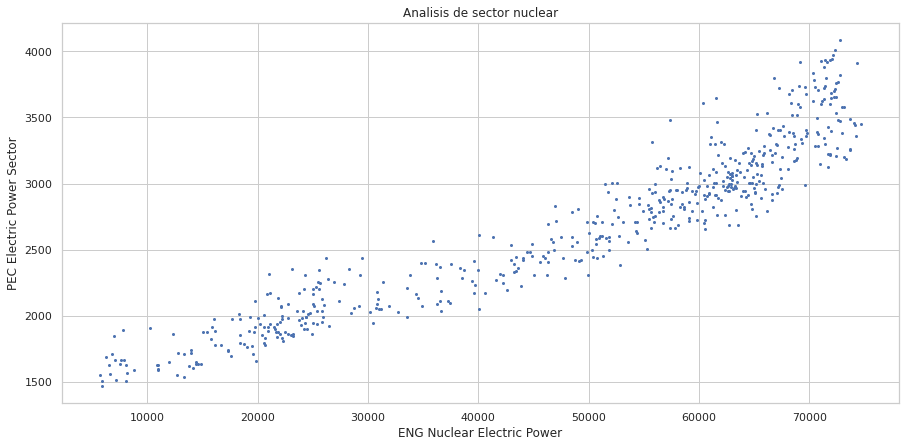

In [ ]:
plt.figure(figsize=(15, 7))
plt.scatter(merged_df["Value_GENERATE"], merged_df["Value_CONSUME"], s=4)
plt.title("Analisis de sector nuclear")
plt.xlabel(generate_category)
plt.ylabel(consume_category)

Escriba código para producir diagramas de dispersión adicionales que brinden una idea de la relación entre el consumo de energía para el sector comercial y la generación de energía neta de energía eléctrica nuclear. ¿Es la relación entre estas variables más fuerte o más débil cuando se compara con el resultado del sector eléctrico? ¿Qué podría significar esto en términos de una posible recomendación del Departamento de Energía?

Text(0, 0.5, 'PEC Commercial Sector')

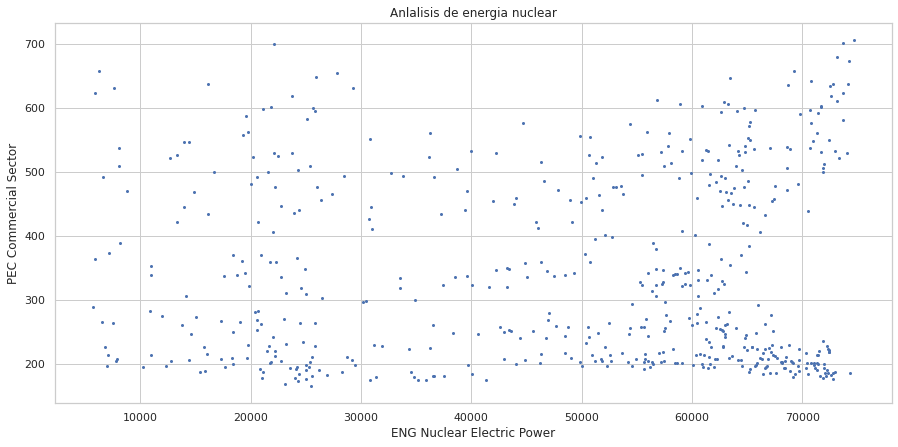

In [ ]:
consume_category = "PEC Commercial Sector"
generate_category = "ENG Nuclear Electric Power"

# Seleccionar sector de energia electrica para  energy consumption
consume_df = clean_energy_df[clean_energy_df["Description"] == consume_category][
    ["YYYYMM", "Value"]
].reset_index(drop=True)

# Seleccionar electricidad generada por todos los sectores
generate_df = clean_electricity_df[
    clean_electricity_df["Description"] == generate_category
][["YYYYMM", "Value"]].reset_index(drop=True)

# Merge en un solo dataframe
merged_df = pd.merge(
    consume_df,
    generate_df,
    how="left",
    on=["YYYYMM"],
    suffixes=("_CONSUME", "_GENERATE"),
)

# scatter plot
plt.figure(figsize=(15, 7))
plt.scatter(merged_df["Value_GENERATE"], merged_df["Value_CONSUME"], s=4)
plt.title("Anlalisis de energia nuclear")
plt.xlabel(generate_category)
plt.ylabel(consume_category)

A partir de estos gráficos, vemos que los niveles de consumo del sector comercial no siguen muy bien los niveles de generación de energía eléctrica nuclear, mientras que los niveles del sector de energía eléctrica sí lo hacen. Esto puede significar que es fundamental que el DoE dedique recursos significativos a la generación de electricidad para el sector de energía eléctrica, ya que parece ser un impulsor significativo de la demanda marginal de energía nuclear, mientras que no es tan importante para el DoE dedicar recursos hacia la generación de electricidad para el sector comercial.

## Tendencias en el consumo y la generación de energía a lo largo del tiempo 

Si bien un diagrama de dispersión nos ayuda a visualizar la relación entre dos variables, no nos permite mirar algo a lo largo del tiempo. Para ello, contaremos con una herramienta diferente: el **gráfico de líneas**.

Un gráfico de líneas es excelente para ver datos de series de tiempo y nos ayudará a determinar tendencias y patrones cíclicos a lo largo del tiempo tanto para el consumo de energía del sector de energía eléctrica como para la generación de energía eléctrica nuclear.

Construyamos una gráfica lineal para cada una de estas series:

In [ ]:
consume_category = "PEC Electric Power Sector"
generate_category = "ENG Nuclear Electric Power"

# Seleccionar el sector electrico para consumo de energia
consume_df = clean_energy_df[clean_energy_df["Description"] == consume_category][
    ["YYYYMM", "Value"]
].reset_index(drop=True)

# Seleccionar electricidad para todos los sectores
generate_df = clean_electricity_df[
    clean_electricity_df["Description"] == generate_category
][["YYYYMM", "Value"]].reset_index(drop=True)

# Merge en un dataframe
merged_df = pd.merge(
    consume_df,
    generate_df,
    how="left",
    on=["YYYYMM"],
    suffixes=("_CONSUME", "_GENERATE"),
)

Text(0, 0.5, 'ENG Nuclear Electric Power')

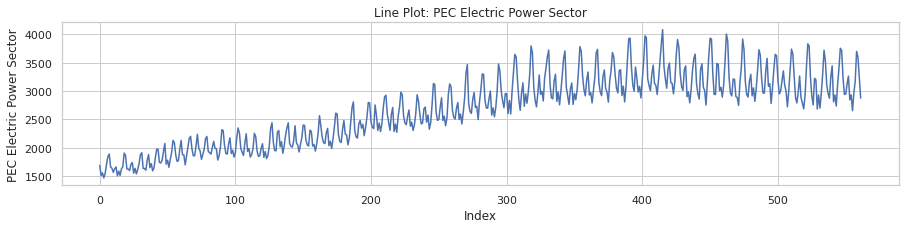

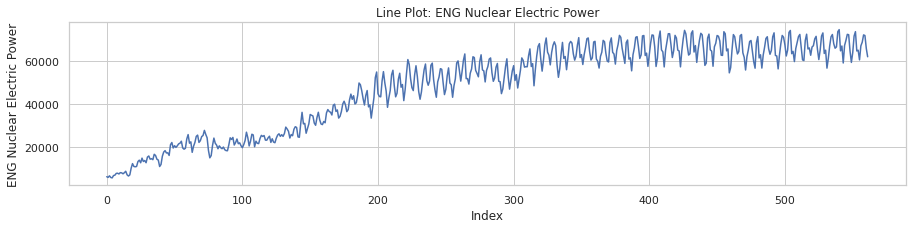

In [ ]:
# Line plot energy consumption 
plt.figure(figsize=(15, 3))
plt.plot(merged_df["Value_CONSUME"])
plt.title("Line Plot: " + consume_category)
plt.xlabel("Index")
plt.ylabel(consume_category)

# Line plot electricity generation
plt.figure(figsize=(15, 3))
plt.plot(merged_df["Value_GENERATE"])
plt.title("Line Plot: " + generate_category)
plt.xlabel("Index")
plt.ylabel(generate_category)

Nótese que vemos que tanto el consumo de energía como la generación están aumentando con el tiempo, con una fuerte tendencia cíclica (observe la naturaleza oscilante de la serie temporal). Sin embargo, la forma en que hemos trazado estos gráficos de líneas no permite un formato e interpretación agradables del eje x. Nos gustaría que el eje x fueran fechas en lugar de simplemente el valor del índice DataFrame.

### Mejora de la visualización de series de tiempo al incluir fechas formateadas en el gráfico de líneas

Afortunadamente, Python nos permite dar un formato agradable a las fechas para mostrarlas en la gráfica. Esto es útil cuando se incluye trabajo en un informe que se presentará a una audiencia, ya que es más profesional y más fácil de entender para personas sin conocimientos técnicos.

In [ ]:
# Convertir YYYYMM string a datetime 
merged_df["YYYYMM_dt"] = merged_df["YYYYMM"].apply(
    lambda x: datetime.datetime.strptime(str(x), "%Y%m")
)
merged_df.head()

,YYYYMM,Value_CONSUME,Value_GENERATE,YYYYMM_dt
0,197301,1691.096,6246.251,1973-01-01
1,197302,1511.458,5928.069,1973-02-01
2,197303,1559.159,6649.007,1973-03-01
3,197304,1470.152,5876.392,1973-04-01
4,197305,1551.631,5696.657,1973-05-01


In [ ]:
type(merged_df.YYYYMM_dt[0])
#type(merged_df.YYYYMM[0])

pandas._libs.tslibs.timestamps.Timestamp

Text(0, 0.5, 'ENG Nuclear Electric Power')

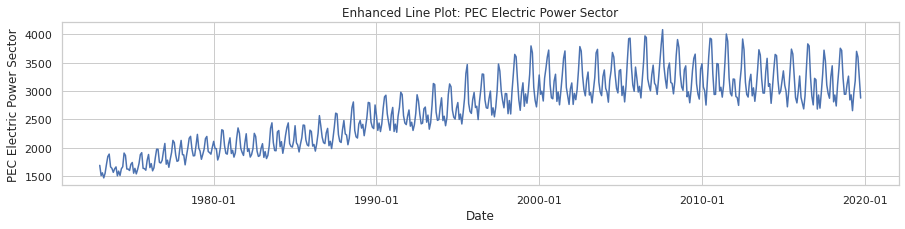

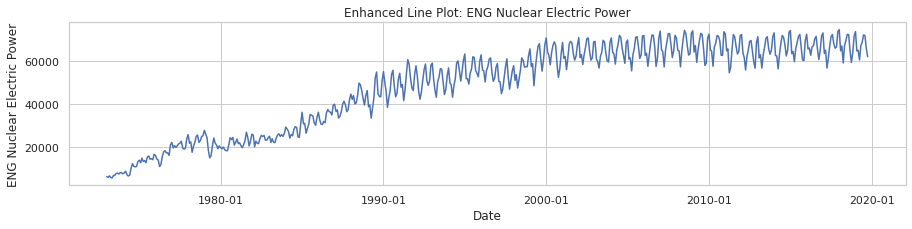

In [ ]:
# Grafica mejorada energy consumption 
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(merged_df["YYYYMM_dt"], merged_df["Value_CONSUME"])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))  # format x-axis display
plt.title("Enhanced Line Plot: " + consume_category)
plt.xlabel("Date")
plt.ylabel(consume_category)

# Grafica mejorada  electricity generation
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(merged_df["YYYYMM_dt"], merged_df["Value_GENERATE"])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))  # format x-axis display
plt.title("Enhanced Line Plot: " + generate_category)
plt.xlabel("Date")
plt.ylabel(generate_category)


Escriba código para determinar si las oscilaciones en la variable ```PEC Electric Power Sector``` aumentan con el tiempo (**Sugerencia:** use ``` merged_df ['Value_CONSUME'].pct_change()```) . Grafique el cambio porcentual de cada mes a lo largo del tiempo, utilizando las fechas formateadas en el eje x.

Text(0, 0.5, 'PEC Electric Power Sector')

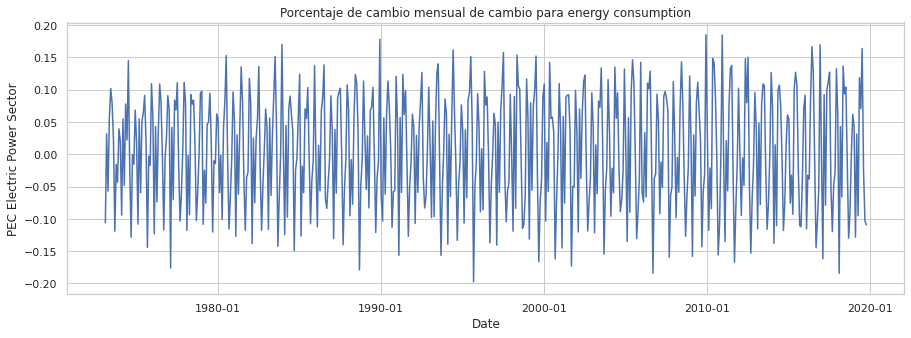

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(merged_df["YYYYMM_dt"], merged_df["Value_CONSUME"].pct_change())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))  # formatear el x-axis 
plt.title("Porcentaje de cambio mensual de cambio para energy consumption")
plt.xlabel("Date")
plt.ylabel(consume_category)

Vemos que los cambios porcentuales de un mes a otro no están creciendo significativamente con el tiempo. Esto indica que las fluctuaciones porcentuales en el consumo de energía permanecen relativamente constantes, incluso cuando la cantidad total de energía utilizada a lo largo del tiempo ha aumentado.

A la luz de esto, una estadística útil para comprender mejor el uso de energía en relación con la generación de electricidad es la relación entre la energía consumida y la electricidad generada. Esto puede darnos una idea de qué tan bien la oferta satisface la demanda y cómo la energía nuclear puede expandirse y contraer la generación de electricidad en períodos de alta o baja demanda.

## Análisis de la relación entre la energía consumida y la electricidad generada 

Calculemos la proporción de energía consumida sobre energía generada. Usando el método de ```pandas``` ```describe()```, echemos un vistazo a algunas estadísticas resumidas que describen la distribución de esta proporción. Comprender la distribución de la relación nos permitirá ver cómo el consumo de energía y la generación de electricidad se desvían entre sí. Continuaremos analizando el consumo de energía del ```PEC Electric Power Sector``` y la generación de energía ```ENG Nucler electric Power``` para esto:

In [ ]:
merged_df

,YYYYMM,Value_CONSUME,Value_GENERATE,YYYYMM_dt
0,197301,1691.096,6246.251,1973-01-01
1,197302,1511.458,5928.069,1973-02-01
2,197303,1559.159,6649.007,1973-03-01
3,197304,1470.152,5876.392,1973-04-01
4,197305,1551.631,5696.657,1973-05-01
...,...,...,...,...
557,201906,3180.175,68804.879,2019-06-01
558,201907,3701.225,72198.595,2019-07-01
559,201908,3601.167,71910.684,2019-08-01
560,201909,3230.691,65892.180,2019-09-01


In [ ]:
# Agregar un nuevo feature 'Ratio' feature: energy consumed / energy generated
merged_df["Ratio"] = merged_df["Value_CONSUME"] / merged_df["Value_GENERATE"]
merged_df["MM"] = merged_df["YYYYMM"].apply(
    lambda x: int(str(x)[-2:])
)  # agregar mes y hacer el grouping
merged_df["Ratio"].describe()

count    562.000000
mean       0.067162
std        0.037070
min        0.042228
25%        0.048402
50%        0.052376
75%        0.074305
max        0.272376
Name: Ratio, dtype: float64

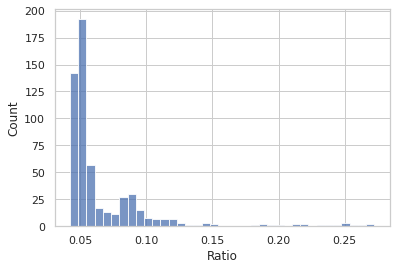

In [ ]:
sns.histplot(merged_df.Ratio)

In [ ]:
merged_df

,YYYYMM,Value_CONSUME,Value_GENERATE,YYYYMM_dt,Ratio,MM
0,197301,1691.096,6246.251,1973-01-01,0.270738,1
1,197302,1511.458,5928.069,1973-02-01,0.254966,2
2,197303,1559.159,6649.007,1973-03-01,0.234495,3
3,197304,1470.152,5876.392,1973-04-01,0.250179,4
4,197305,1551.631,5696.657,1973-05-01,0.272376,5
...,...,...,...,...,...,...
557,201906,3180.175,68804.879,2019-06-01,0.046220,6
558,201907,3701.225,72198.595,2019-07-01,0.051265,7
559,201908,3601.167,71910.684,2019-08-01,0.050078,8
560,201909,3230.691,65892.180,2019-09-01,0.049030,9


También es útil para obtener una representación gráfica de la distribución de datos mediante la construcción de un **histograma**. Se puede mostrar un histograma usando el método ```plt.hist()``` en Python. Este método de histograma toma la entrada ```bin``` que indica qué tan granularmente le gustaría ver los datos. En este caso, usaremos 50 contenedores:

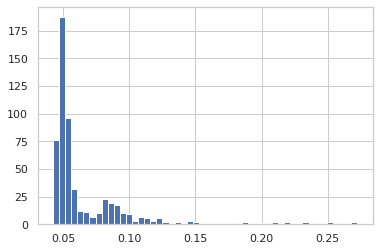

In [ ]:
plt.hist(merged_df['Ratio'], bins=50);

Aquí vemos que la variable ```Ratio``` está agrupada en gran medida alrededor de 0.05, con algunos valores grandes que se extienden hacia arriba hasta 0.25, aunque estos valores más altos no son comunes (por lo tanto, tienen una barra con una altura menor en el histograma). .

¿Hay algo que combine un visual para la distribución de los datos con las estadísticas de resumen? ¡Ahi esta! El **boxplot** nos permite observar si hay valores extremos significativos presentes en los datos y puede ayudarnos a determinar si los datos tienen una gran varianza o están sesgados.

Dado que vimos un patrón cíclico en el análisis de la gráfica lineal que precede a esta sección, echemos un vistazo más de cerca a cómo evoluciona la distribución de la relación entre la energía consumida y la generada en los diferentes meses del año. Lo haremos creando una serie de diagramas de caja uno al lado del otro, uno por mes:

In [ ]:
# Seleccionar los meses
unique_months = range(1, 13)

# Hacer el Loop por los meses y guardarlos en cada DataFrame por medio de list
df_list = []
for month_int in unique_months:
    temp_df = merged_df[merged_df["MM"] == month_int][["Ratio"]].reset_index(
        drop=True
    )  # Seleccionar mes
    temp_df = temp_df.rename(
        columns={"Ratio": "Ratio_" + str(month_int)}
    )  # renombrar para plot
    df_list.append(temp_df)  # Almacenarlo para concatenacion

# Agregar data
plot_df = pd.concat(df_list, axis=1)
plot_df

,Ratio_1,Ratio_2,Ratio_3,Ratio_4,Ratio_5,Ratio_6,Ratio_7,Ratio_8,Ratio_9,Ratio_10,Ratio_11,Ratio_12
0,0.270738,0.254966,0.234495,0.250179,0.272376,0.252021,0.265259,0.242748,0.211748,0.217979,0.192574,0.202925
1,0.218826,0.185690,0.181088,0.212228,0.248473,0.235417,0.186878,0.151295,0.147710,0.149602,0.145402,0.128641
2,0.124935,0.121974,0.110084,0.115603,0.117653,0.135227,0.122314,0.120571,0.113836,0.111703,0.113362,0.106786
3,0.116951,0.114821,0.123041,0.145199,0.138128,0.115935,0.111594,0.107540,0.100825,0.099844,0.110320,0.091942
4,0.093778,0.087313,0.086224,0.083406,0.087176,0.089179,0.097662,0.091968,0.095563,0.092536,0.091186,0.082951
5,0.082486,0.086084,0.083557,0.096710,0.090969,0.090215,0.086737,0.086053,0.089074,0.080816,0.074791,0.080230
6,0.080514,0.076986,0.079935,0.097625,0.125217,0.122952,0.103833,0.090934,0.088786,0.091533,0.098092,0.097480
7,0.107089,0.103168,0.099067,0.094988,0.101061,0.109777,0.110300,0.094775,0.086498,0.077640,0.090003,0.093566
8,0.091539,0.087990,0.088955,0.088945,0.097001,0.102633,0.101880,0.083750,0.081578,0.093351,0.081890,0.080204
9,0.087561,0.095979,0.087278,0.084330,0.086941,0.082653,0.088569,0.088083,0.076473,0.079529,0.080166,0.081775


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Ratio por mes ')

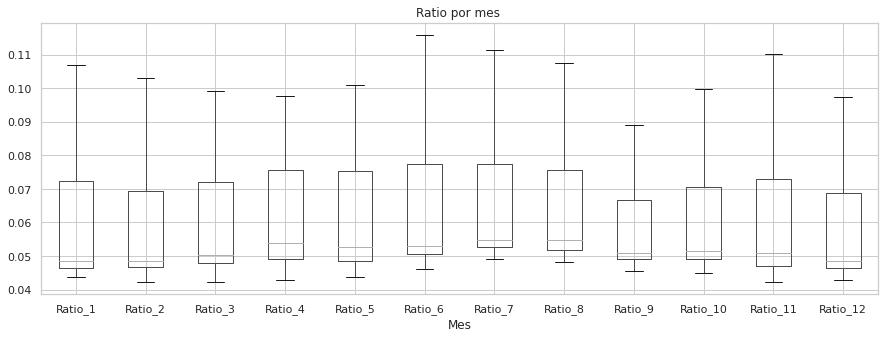

In [ ]:
# Seleccionar los meses
unique_months = range(1, 13)

# Hacer el Loop por los meses y guardarlos en cada DataFrame por medio de list
df_list = []
for month_int in unique_months:
    temp_df = merged_df[merged_df["MM"] == month_int][["Ratio"]].reset_index(
        drop=True
    )  # Seleccionar mes
    temp_df = temp_df.rename(
        columns={"Ratio": "Ratio_" + str(month_int)}
    )  # renombrar para plot
    df_list.append(temp_df)  # Almacenarlo para concatenacion

# Agregar data
plot_df = pd.concat(df_list, axis=1)

# Box plots
fig, ax = plt.subplots(figsize=(15, 5))
plot_df.boxplot(ax=ax, showfliers=False)
ax.set_xlabel("Mes")
ax.set_title("Ratio por mes ")

Cada diagrama de caja consta de una caja interior y dos "bigotes" a cada lado. La línea horizontal central en el medio del cuadro corresponde a la mediana de los datos que representa el diagrama de cuadro, mientras que los bordes superior e inferior del cuadro representan el percentil 75 y el percentil 25 de los datos, respectivamente. Los bigotes se dibujan a 1,5 veces el **rango intercuartil (IQR)** desde los bordes de la caja o en los valores mínimo / máximo en los datos, lo que esté más cerca. El IQR es la diferencia entre el valor del percentil 75 y el valor del percentil 25.


Recuerde que la relación es la energía consumida (PEC Electric Power Sector) dividida por la energía generada (ENG Nuclear Electric Power). ¿Qué patrones observa en esta proporción en los gráficos de arriba? ¿Cuál podría ser una posible razón de estos patrones? ¿Qué le recomendaría a su jefe basándose en esto?

**respuesta.** Aquí, vemos un patrón de ratios más altos en los meses de verano, particularmente julio (mes 7) y agosto (mes 8), ya que los cuadros del diagrama de caja se desplazan hacia arriba en los meses de verano y, posteriormente, hacia abajo en los meses de invierno.

Los meses de verano conducen a un mayor consumo de energía dirigido a la capacidad de enfriamiento debido a las altas temperaturas en los EE. UU. La cantidad de energía que se genera no aumenta tanto como la energía que se consume, por lo que hay una tendencia al alza en la proporción de consumo a generado energía. A partir de esto, puede darse el caso de que una planta nuclear esté justificada para proporcionar cantidades marginales de energía para satisfacer la demanda (sin embargo, es necesario realizar más investigaciones para validar esta hipótesis).

Ahora que hemos visto algunas de las herramientas básicas de visualización de datos de Python, comencemos a explorar estos picos cíclicos en los meses de verano utilizando un segundo paquete muy útil: ```seaborn```.

## Usar ```seaborn``` para visualizacion avanzada de los patrones ciclicos


Si bien ```matplotlib``` es un buen paquete de trazado, está destinado a ser una herramienta de trazado general para muchos casos de uso. ```seaborn``` es una libreria de visualización de datos extremadamente útil diseñada específicamente para cifras estadísticas. Pasaremos por algunas funciones de trazado importantes mientras continuamos identificando tendencias en los datos de energía. Solo estaremos rascando la superficie de ```seaborn``` pero [aquí](https://seaborn.pydata.org/api.html) hay una lista de todas las tramas posibles.

Para explorar más a fondo los patrones cíclicos identificados en los meses de verano, etiquetemos las filas en el ``` merged_df``` que representan los meses de verano (llámelos meses pico) y usemos los gráficos de seaborn para visualizar las diferencias de distribución en la energía consumida y la electricidad generada. entre los meses pico y no pico:

In [ ]:
# Agregat un flag para meses de verano
customized_df = merged_df.copy()
customized_df["PEAK_FLAG"] = customized_df["YYYYMM"].apply(
    lambda x: "PEAK" if str(x)[-2:] in ["07", "08"] else "NOT PEAK"
)

In [ ]:
customized_df

,YYYYMM,Value_CONSUME,Value_GENERATE,YYYYMM_dt,Ratio,MM,PEAK_FLAG
0,197301,1691.096,6246.251,1973-01-01,0.270738,1,NOT PEAK
1,197302,1511.458,5928.069,1973-02-01,0.254966,2,NOT PEAK
2,197303,1559.159,6649.007,1973-03-01,0.234495,3,NOT PEAK
3,197304,1470.152,5876.392,1973-04-01,0.250179,4,NOT PEAK
4,197305,1551.631,5696.657,1973-05-01,0.272376,5,NOT PEAK
...,...,...,...,...,...,...,...
557,201906,3180.175,68804.879,2019-06-01,0.046220,6,NOT PEAK
558,201907,3701.225,72198.595,2019-07-01,0.051265,7,PEAK
559,201908,3601.167,71910.684,2019-08-01,0.050078,8,PEAK
560,201909,3230.691,65892.180,2019-09-01,0.049030,9,NOT PEAK


## ¿Los meses pico de consumo y generación son consistentes a lo largo de muchos años? 
Veamos ahora los niveles de consumo y generación mes a mes a lo largo del tiempo para ver si los patrones cíclicos máximos que vemos son estables a lo largo de muchas décadas de datos.

```seaborn``` ofrece un poderoso [**mapa de calor**](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap) método ``` heatmap() ``` que nos permitirá visualizar muy bien la energía mensual consumida y la electricidad generada a lo largo del tiempo:

In [ ]:
# Extraer el año para hacer elheatmap
customized_df["YYYY"] = customized_df["YYYYMM"].apply(lambda x: str(x)[:-2])
customized_df

,YYYYMM,Value_CONSUME,Value_GENERATE,YYYYMM_dt,Ratio,MM,PEAK_FLAG,YYYY
0,197301,1691.096,6246.251,1973-01-01,0.270738,1,NOT PEAK,1973
1,197302,1511.458,5928.069,1973-02-01,0.254966,2,NOT PEAK,1973
2,197303,1559.159,6649.007,1973-03-01,0.234495,3,NOT PEAK,1973
3,197304,1470.152,5876.392,1973-04-01,0.250179,4,NOT PEAK,1973
4,197305,1551.631,5696.657,1973-05-01,0.272376,5,NOT PEAK,1973
...,...,...,...,...,...,...,...,...
557,201906,3180.175,68804.879,2019-06-01,0.046220,6,NOT PEAK,2019
558,201907,3701.225,72198.595,2019-07-01,0.051265,7,PEAK,2019
559,201908,3601.167,71910.684,2019-08-01,0.050078,8,PEAK,2019
560,201909,3230.691,65892.180,2019-09-01,0.049030,9,NOT PEAK,2019


In [ ]:
# Extraer el año para hacer elheatmap
customized_df["YYYY"] = customized_df["YYYYMM"].apply(lambda x: str(x)[:-2])
customized_df

,YYYYMM,Value_CONSUME,Value_GENERATE,YYYYMM_dt,Ratio,MM,PEAK_FLAG,YYYY
0,197301,1691.096,6246.251,1973-01-01,0.270738,1,NOT PEAK,1973
1,197302,1511.458,5928.069,1973-02-01,0.254966,2,NOT PEAK,1973
2,197303,1559.159,6649.007,1973-03-01,0.234495,3,NOT PEAK,1973
3,197304,1470.152,5876.392,1973-04-01,0.250179,4,NOT PEAK,1973
4,197305,1551.631,5696.657,1973-05-01,0.272376,5,NOT PEAK,1973
...,...,...,...,...,...,...,...,...
557,201906,3180.175,68804.879,2019-06-01,0.046220,6,NOT PEAK,2019
558,201907,3701.225,72198.595,2019-07-01,0.051265,7,PEAK,2019
559,201908,3601.167,71910.684,2019-08-01,0.050078,8,PEAK,2019
560,201909,3230.691,65892.180,2019-09-01,0.049030,9,NOT PEAK,2019


In [ ]:
# Crear una pivot table 
pivot_elec_df = customized_df.pivot(index="MM", columns="YYYY", values="Value_GENERATE")
pivot_elec_df

YYYY,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
MM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,6246.251,7602.790,13938.354,16098.884,22152.064,25832.949,27792.163,19745.966,23778.769,25677.834,25073.059,29313.313,36186.298,36218.874,39974.825,44658.450,46327.876,55119.378,54368.993,57848.681,59076.169,56846.753,63341.706,62941.562,58914.427,57888.880,65689.472,70762.352,68707.077,70925.863,69211.084,70806.160,69828.239,71911.532,74006.184,70734.570,74102.489,72569.341,72742.813,72381.186,71405.817,73162.609,74269.974,72524.775,73120.612,74649.040,73700.844
2,5928.069,8115.522,12733.338,14377.127,19600.518,21832.500,25910.788,19277.338,21595.261,20187.619,22197.767,28435.519,30812.422,32721.017,36598.257,42246.023,38724.747,49962.644,47862.642,52803.662,51319.099,49821.381,51858.111,55927.692,50657.615,50998.718,57489.279,64178.502,61272.407,61658.274,60941.869,64101.949,60946.934,62615.654,65224.794,65130.385,64227.211,65245.370,64789.078,63847.023,61483.385,62638.950,63461.493,65638.141,63560.371,64790.030,64714.894
3,6649.007,8777.497,14881.784,13992.977,20672.203,22448.665,24334.822,20038.872,22004.399,22755.478,23890.193,27344.704,31041.225,30773.127,37290.006,43912.016,39636.347,46087.114,49121.188,45835.381,46605.706,48969.479,51879.920,55473.880,50414.084,53711.047,58838.125,62736.512,62140.712,63040.647,59933.261,63285.116,61538.530,63720.849,64305.153,64716.468,67240.567,64634.721,65661.598,61728.613,62947.389,62397.080,64546.799,66148.894,65093.200,67032.656,65079.691
4,5876.392,7128.892,13327.245,10981.808,19866.564,17579.902,18417.942,18793.503,20646.019,21784.661,22334.793,24231.118,26458.274,30476.660,33517.740,40066.609,33494.851,38516.014,41631.054,42267.583,43198.624,43192.096,49320.883,50325.240,44882.839,47502.988,48529.139,58259.145,56003.026,58437.062,56775.591,58620.255,55484.010,57567.204,57301.424,57332.716,59408.407,57611.073,54547.338,55870.931,56766.882,56384.588,59784.495,62731.845,56743.352,59133.155,60580.927
5,5696.657,6562.335,13763.765,11929.390,20599.284,20416.170,15024.851,18384.807,19723.090,21638.768,22050.937,25866.506,28697.365,31924.086,34320.408,40650.384,38338.755,42945.119,46754.597,45627.313,50366.855,48525.043,54386.954,55636.922,47031.786,51496.327,56056.776,63975.913,61512.445,63032.192,62201.960,64917.412,62970.464,62775.701,65024.555,64825.901,65395.452,66658.365,57012.914,62081.445,62848.155,62947.430,65826.525,66576.493,61312.753,67320.248,67123.546
6,6784.152,7079.595,12743.820,15757.435,21517.301,22185.187,16065.455,18322.206,21165.626,24026.011,24151.858,25299.389,30836.969,31333.867,36560.089,44079.082,42976.005,46332.308,54208.487,51185.047,52620.167,51751.052,56380.848,57497.751,52094.784,55731.853,62300.248,67298.550,68023.098,66371.896,64180.727,67734.073,66144.275,68391.472,68923.074,70319.366,69734.736,68301.322,65270.134,65140.085,66429.690,68138.232,68516.165,67175.324,67010.782,69687.556,68804.879
7,6960.486,10209.908,15372.216,17708.727,21824.835,25007.094,20824.729,21023.937,23079.647,25467.060,25602.084,28284.305,35184.214,35893.532,40055.583,49828.437,52331.024,53644.726,60734.600,56048.753,56502.161,59122.618,62037.146,60953.431,57352.132,61499.085,66814.583,68971.667,69166.040,70420.827,69652.754,71975.040,71070.011,72186.494,72738.535,74318.270,72948.979,71913.468,72344.850,69129.329,70539.238,71940.126,71412.176,70349.347,71314.219,72456.009,72198.595
8,7785.326,12333.452,15879.687,18362.580,22749.668,25599.306,24204.083,24332.931,26946.387,24986.071,26201.317,29493.032,34812.142,37483.147,41352.353,49035.279,54947.688,55758.133,58472.648,58655.626,56208.868,60104.031,61660.819,61476.508,61083.700,60368.984,68142.717,67226.150,68389.496,70777.688,69023.878,71068.483,71381.550,72016.095,72750.910,72617.066,72244.597,71574.103,71338.566,69602.111,71344.379,71128.74

In [ ]:
pivot_ener_df = customized_df.pivot("MM", "YYYY", "Value_CONSUME")
pivot_ener_df

YYYY,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
MM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1691.096,1663.689,1741.385,1882.783,2077.373,2130.852,2237.651,2114.576,2176.681,2248.365,2073.327,2305.616,2390.419,2288.518,2343.276,2481.795,2482.788,2573.631,2712.536,2668.016,2719.243,2882.220,2798.883,2976.053,3000.615,2954.019,3146.643,3284.641,3297.992,3144.149,3336.852,3373.306,3379.442,3222.909,3458.582,3495.107,3445.647,3483.437,3475.911,3208.610,3296.855,3578.349,3357.244,3266.676,3201.133,3446.463,3264.257
2,1511.458,1506.973,1553.135,1650.798,1711.388,1879.423,1994.768,1988.801,1900.157,1937.589,1831.926,2018.788,2087.610,2031.073,2037.128,2245.242,2347.891,2307.669,2287.976,2382.146,2451.897,2480.682,2500.895,2710.716,2578.190,2602.058,2733.381,2944.720,2819.488,2765.836,2931.227,3049.380,2922.635,2984.437,3139.945,3151.900,2900.672,3072.818,3004.941,2904.639,2916.499,3084.762,3103.230,2888.973,2684.009,2811.327,2845.534
3,1559.159,1589.502,1638.241,1721.705,1782.450,1875.744,1945.198,1985.185,1957.393,1986.063,1934.444,2109.281,2048.990,2059.263,2115.226,2226.646,2414.529,2437.304,2417.813,2451.401,2577.956,2557.508,2595.295,2733.451,2706.475,2834.626,2951.101,2998.527,2984.113,2959.779,2973.431,2983.341,3087.555,3083.945,3101.754,3136.619,2987.615,3007.594,3068.039,2888.080,3057.725,3129.905,3002.401,2793.958,2931.646,2931.829,2934.622
4,1470.152,1512.953,1540.673,1594.553,1656.988,1700.153,1798.060,1785.161,1836.351,1837.108,1811.133,1903.732,1927.396,1942.650,1987.932,2054.556,2214.039,2286.906,2274.560,2306.770,2329.299,2389.952,2420.771,2498.199,2547.041,2597.424,2786.954,2826.088,2758.496,2849.060,2791.799,2805.456,2810.048,2879.903,2942.583,2952.049,2794.631,2754.274,2894.316,2748.757,2820.329,2784.665,2723.291,2686.606,2699.966,2738.131,2655.417
5,1551.631,1630.562,1619.351,1647.787,1795.764,1857.237,1881.371,1857.988,1913.153,1881.286,1865.162,2037.542,2062.864,2073.064,2161.784,2169.909,2364.096,2422.657,2555.740,2405.742,2442.409,2530.000,2623.970,2818.848,2716.180,2996.362,2996.202,3228.283,3003.061,3030.481,3021.309,3184.553,3081.936,3197.017,3206.697,3170.238,3021.154,3162.822,3110.114,3155.558,3039.799,3058.969,3001.644,2917.620,2970.605,3112.398,2970.368
6,1709.752,1666.660,1723.312,1826.842,1918.889,2001.427,1975.284,2011.359,2172.290,1985.813,2036.037,2220.934,2177.209,2256.323,2368.970,2438.117,2538.026,2697.495,2712.955,2606.091,2749.836,2939.045,2875.365,3033.326,3004.705,3314.226,3296.222,3406.821,3277.448,3372.291,3240.755,3361.874,3532.770,3521.174,3518.359,3624.014,3358.016,3610.327,3522.727,3407.437,3370.695,3386.539,3382.634,3403.962,3302.613,3402.754,3180.175
7,1846.331,1908.007,1880.241,1976.180,2131.452,2169.036,2162.284,2318.950,2351.351,2255.603,2344.494,2356.478,2402.079,2568.170,2611.546,2708.943,2800.908,2898.925,2980.748,2936.448,3134.628,3127.173,3310.846,3302.101,3477.746,3647.734,3797.512,3602.115,3579.287,3785.686,3674.245,3681.799,3924.443,3974.049,3823.894,3909.519,3577.481,3933.012,4007.452,3918.890,3729.894,3646.954,3740.900,3833.017,3722.379,3756.482,3701.225
8,1889.873,1865.990,1914.625,1974.717,2092.245,2202.903,2200.984,2306.155,2256.770,2200.859,2441.243,2439.937,2396.789,2388.496,2598.937,2809.051,2792.005,2928.105,2939.808,2826.686,3116.742,3076.939,3468.818,3296.713,3353.807,3606.275,3677.642,3724.138,3708.590,3706.457,3736.996,3602.409,3934.368,3945.157,4084.460,3769.558,3652.597,3916.344,3881.823,3730.458,3636.552,3625.994,3655.121,3796.744,3530.744,3717.461,3601.167
9,1664.842,1626.253,1638.784,1743.297,1875.895,1976.464,1935.870,2038.964,1990.389,1941.688,2093.214,2076.288,2138.921,2188.107,2234.295,2305.875,2453.739,2596.990,2566.394,2591.361,2628.879,2666.078,2782.912,2843.951,3003.522,3193.026,3066.356,3120.952,3066.009,3266.213,3158.531,3282.110,3420.286,3217.739,34

Text(0.5, 1.0, 'ENG Nuclear Electric Power')

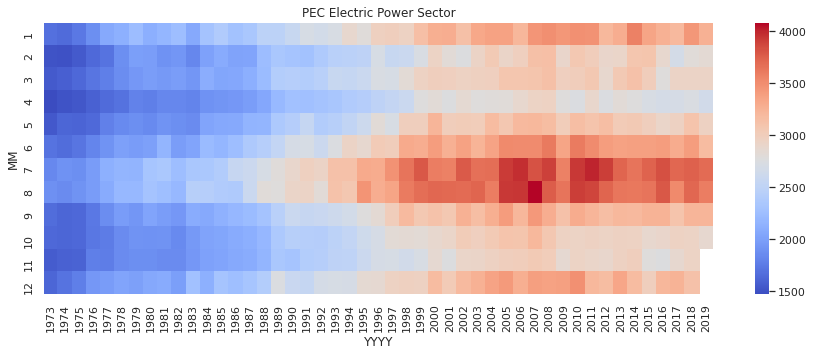

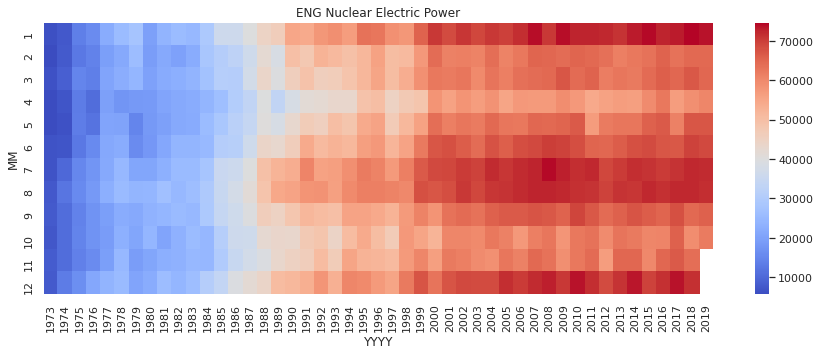

In [ ]:
# Heat map de energy consumption por mes y año
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(pivot_ener_df, cmap="coolwarm", ax=ax)
ax.set_title("PEC Electric Power Sector")

# Heat map de electricity generation por mes y año
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(pivot_elec_df, cmap="coolwarm", ax=ax)
ax.set_title("ENG Nuclear Electric Power")

La barra de color de la derecha indica el nivel de la variable en estudio. Usando el mapa de calor, es fácil ver que hay un aumento notable tanto en el consumo de energía como en la generación en los meses pico de verano que comenzaron en la década de 1990. Sin embargo, en los primeros años (antes de 1990) la diferencia entre los meses pico de verano y otros meses no es tan marcada (aunque todavía existe). Esto puede deberse al aumento en el uso de unidades de refrigeración en las últimas décadas.

Además, vemos que la energía total consumida y la electricidad generada con el tiempo están aumentando. Esto se indica mediante los colores que se mueven de azul a rojo en ambos mapas de calor a medida que pasan los años. Esto se espera, ya que la demanda agregada ha aumentado debido a numerosos factores externos, como el crecimiento de la población y el mayor uso de tecnología, los cuales conducen a una mayor demanda de energía y suministro de electricidad.

Estos mapas de calor son enormemente útiles para identificar grandes tendencias a lo largo del tiempo. Sin embargo, una desventaja de estos mapas de calor es que es difícil ser más granular y ver cambios en las tasas de crecimiento de un año a otro. Construyamos un diagrama de caja para comprender mejor si el crecimiento es estable a lo largo del tiempo y si esto se traduce en un crecimiento tanto en los meses pico como en los no pico.

## Evaluación de las diferencias de estabilidad del crecimiento en las demandas de energía de los meses pico a lo largo del tiempo 

Una forma de comprender mejor la estabilidad del crecimiento del consumo de energía y la generación de electricidad es ver los datos de distribución a lo largo del tiempo. Lo haremos combinando diagramas de caja para cada año, dividiendo los meses pico y no pico, y determinando qué tan estable han sido las categorías de crecimiento, consumo y generación.

Esta vez, usaremos la funcionalidad ```boxplot()``` de seaborn (que es más colorida que la versión en `pandas`), y agregaremos una bandera para dibujar dos diagramas de caja para cada año basados en ```PEAK_FLAG```. Los diagramas de caja para los meses pico y no pico serán de diferentes colores. Puede encontrar la API de boxplot [aquí](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot).


Centrándose en ```customized_df```, escriba un script para generar el diagrama a continuación.

In [ ]:
customized_df.head(5)

,YYYYMM,Value_CONSUME,Value_GENERATE,YYYYMM_dt,Ratio,MM,PEAK_FLAG,YYYY
0,197301,1691.096,6246.251,1973-01-01,0.270738,1,NOT PEAK,1973
1,197302,1511.458,5928.069,1973-02-01,0.254966,2,NOT PEAK,1973
2,197303,1559.159,6649.007,1973-03-01,0.234495,3,NOT PEAK,1973
3,197304,1470.152,5876.392,1973-04-01,0.250179,4,NOT PEAK,1973
4,197305,1551.631,5696.657,1973-05-01,0.272376,5,NOT PEAK,1973


Text(0, 0.5, 'PEC Electric Power Sector')

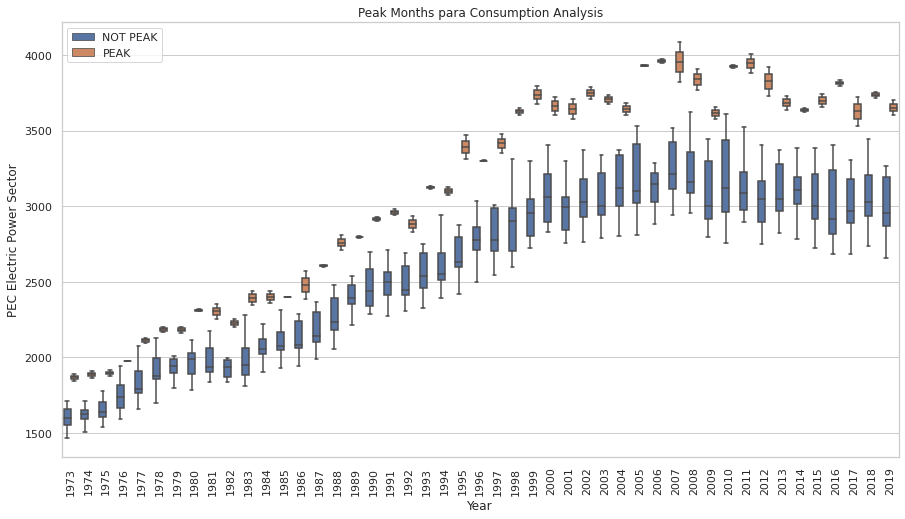

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
m = sns.boxplot(
    x="YYYY",
    y="Value_CONSUME",
    hue="PEAK_FLAG",
    data=customized_df,
    orient="vertical",
    showfliers=False,
)

# Formatear el plot
plt.legend(loc="upper left")
plt.title("Peak Months para Consumption Analysis")
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("PEC Electric Power Sector")

Aquí vemos que el crecimiento en los meses pico y no pico ha sido relativamente estable, pero en los últimos años se ha estancado. También observe que la diferencia entre los meses pico y no pico se ha ampliado con el tiempo. Esta mayor fluctuación entre los meses pico y no pico podría presentar una oportunidad para la energía nuclear y merece una mayor investigación.

Hemos analizado de cerca los cambios en la generación y el consumo de energía eléctrica nuclear a lo largo del tiempo. Pasemos ahora a la segunda parte de la solicitud de su jefe observando los patrones de consumo en todos los sectores. Esto tiene implicaciones importantes sobre cómo el gobierno debe asignar recursos para la energía nuclear.

## ¿Qué sectores consumen más energía?

Podemos responder esta pregunta fácilmente con la funcionalidad ```boxplot()``` de ```seaborn```, que divide los datos en categorías y crea una gráfica de caja de valores para cada categoría:

In [ ]:
clean_energy_df.head()

,YYYYMM,Value,Description,Unit,MM,YYYY
24,197301,1339.270,PEC Residential Sector,Trillion Btu,1,1973
25,197302,1174.899,PEC Residential Sector,Trillion Btu,2,1973
26,197303,983.374,PEC Residential Sector,Trillion Btu,3,1973
27,197304,715.391,PEC Residential Sector,Trillion Btu,4,1973
28,197305,535.914,PEC Residential Sector,Trillion Btu,5,1973


Text(0.5, 1.0, 'Distribuciones de Energy consumption por Sector')

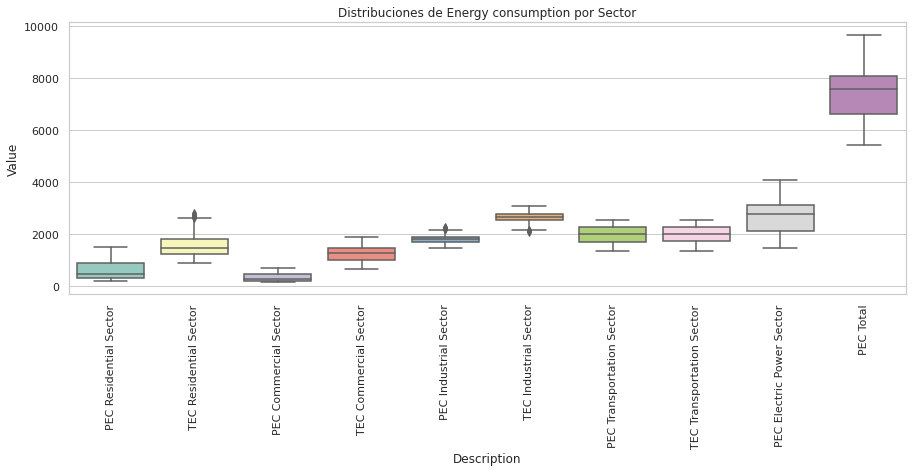

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="Description", y="Value", data=clean_energy_df, palette="Set3", ax=ax)
plt.xticks(rotation=90)
plt.title("Distribuciones de Energy consumption por Sector")

Aquí vemos que el sector de energía eléctrica de PEC tiene el mayor consumo de energía en todos los sectores. También vemos que hay diferencias considerables en la variabilidad del consumo de energía entre sectores (algunos diagramas de caja tienen rangos intercuartílicos mucho más grandes que otros).

Sin embargo, aunque los diagramas de caja le brindan una idea de la distribución de los datos subyacentes en cada categoría, siguen siendo instrumentos relativamente contundentes. Por ejemplo, ¿cómo se distribuyen los datos dentro del rango intercuartílico? ¿Entre los bordes de la caja y los bigotes? Dado que una gráfica de caja se crea a partir de solo cinco valores, no puede responder estas preguntas detalladas. Sin embargo, la **strip plot** puede combinar una gráfica de dispersión 1D con una división por categoría para obtener una vista aún más granular de los datos.

## Una vista más detallada del consumo de energía por sector 

```stripplot()``` en ```seaborn``` crea una serie de diagramas de dispersión 1D (uno para cada categoría de datos) todos compartiendo el mismo eje y. Como verá, ```seaborn``` hace que la API sea similar en todos los gráficos. ```stripplot()``` API se puede encontrar [aquí](https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot):

Text(0.5, 1.0, 'Distribuciones de Energy consumption por Sector')

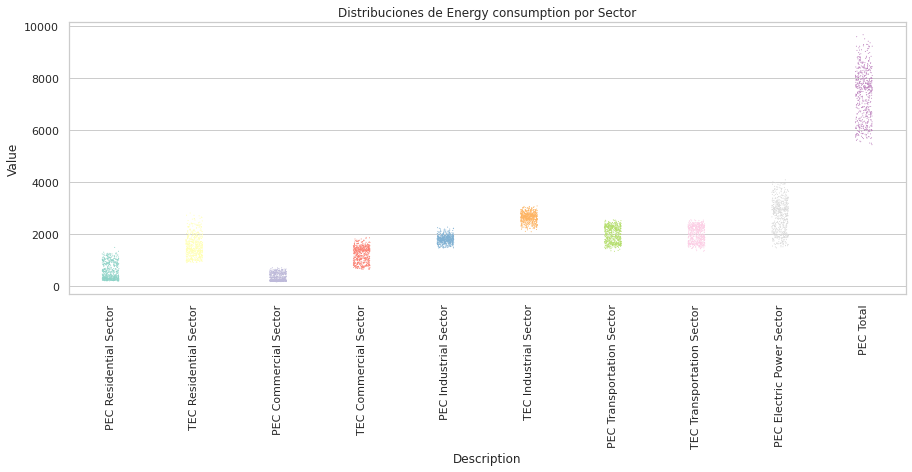

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
m = sns.stripplot(
    x="Description", y="Value", data=clean_energy_df, palette="Set3", s=1, ax=ax
)
plt.xticks(rotation=90)
plt.title("Distribuciones de Energy consumption por Sector")



De los gráficos anteriores, ¿cuál de los sectores tiene el rango más amplio de valores de PEC? ¿Cuál de los sectores tiene el rango más pequeño de valores de PEC? ¿Cómo podría esta información ser útil para las empresas de producción de energía?

**Respuesta.** El rango de valores más amplio parece ser el sector de energía eléctrica, mientras que el rango de valores más pequeño proviene del sector comercial. La información sobre la distribución del uso de energía puede ser muy importante para las empresas a fin de garantizar que cuentan con la infraestructura adecuada para satisfacer la demanda variable de consumo de energía. Si hay una amplia gama de consumo de energía a lo largo del tiempo, las empresas productoras de energía deben tener una infraestructura escalable, al tiempo que mantienen la capacidad de expandir la capacidad cuando sea necesario para satisfacer el exceso de demanda de energía.

Ahora, pasemos a nuestra tarea final: ¿cómo generamos archivos para estos gráficos para que puedan usarse en la presentación de su jefe?

# Generación de plots de manera programática 

Echemos un vistazo a cómo crear gráficos de valores para cada sector de consumo de energía, además de cómo agregar programáticamente una carpeta donde guardaremos los gráficos como archivos PNG:

In [ ]:
# Crear un DataFrame que sera usado para el plot
plot_df = clean_energy_df.copy()
plot_df["YYYYMM_dt"] = plot_df["YYYYMM"].apply(
    lambda x: datetime.datetime.strptime(str(x), "%Y%m")
)
plot_df.head()

,YYYYMM,Value,Description,Unit,MM,YYYY,YYYYMM_dt
24,197301,1339.270,PEC Residential Sector,Trillion Btu,1,1973,1973-01-01
25,197302,1174.899,PEC Residential Sector,Trillion Btu,2,1973,1973-02-01
26,197303,983.374,PEC Residential Sector,Trillion Btu,3,1973,1973-03-01
27,197304,715.391,PEC Residential Sector,Trillion Btu,4,1973,1973-04-01
28,197305,535.914,PEC Residential Sector,Trillion Btu,5,1973,1973-05-01


Ahora hagamos una carpeta llamada ```data/PlotDir``` donde guardaremos los gráficos en archivos PNG:

In [ ]:
plot_dir = os.path.join(os.getcwd(), "/content/gdrive/MyDrive/Bootcamp SENA 2021/Semana 5/")

# Crear un nuevo folder si no existe previamente
if not (os.path.isdir(plot_dir)):
    os.mkdir(plot_dir)  # crear folder

In [ ]:
unique_desc = sorted(plot_df["Description"].unique())
unique_desc

['PEC Commercial Sector',
 'PEC Electric Power Sector',
 'PEC Industrial Sector',
 'PEC Residential Sector',
 'PEC Total',
 'PEC Transportation Sector',
 'TEC Commercial Sector',
 'TEC Industrial Sector',
 'TEC Residential Sector',
 'TEC Transportation Sector']

In [ ]:
# Guardar archivos
unique_desc = sorted(plot_df["Description"].unique())
for i in unique_desc:
    fig, ax = plt.subplots(figsize=(15, 4))
    temp_df = plot_df[plot_df["Description"] == i]
    ax.plot(temp_df["YYYYMM_dt"], temp_df["Value"])
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y%m"))  # format

    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.title("Data Description: " + str(i))
    plt.tight_layout()

    #Guardar en png
    file_name = "SectorPlot " + str(i) + ".png"
    print("Saving: " + file_name)
    fig.savefig(os.path.join(plot_dir, file_name))  # guardar png 
    plt.close(
        fig
    )  

Saving: SectorPlot PEC Commercial Sector.png
Saving: SectorPlot PEC Electric Power Sector.png
Saving: SectorPlot PEC Industrial Sector.png
Saving: SectorPlot PEC Residential Sector.png
Saving: SectorPlot PEC Total.png
Saving: SectorPlot PEC Transportation Sector.png
Saving: SectorPlot TEC Commercial Sector.png
Saving: SectorPlot TEC Industrial Sector.png
Saving: SectorPlot TEC Residential Sector.png
Saving: SectorPlot TEC Transportation Sector.png


## Conclusiones

Hemos realizado un análisis exhaustivo del consumo de energía y las tendencias de generación de electricidad a lo largo del tiempo y en todos los sectores.

Descubrimos que hay un pico en el consumo y la generación de energía en los meses de verano del año y, a medida que pasa el tiempo, la brecha entre el consumo pico y el no pico se ha ampliado. Esto puede presentar una oportunidad de mercado para una planta de energía que tiene la capacidad de expandirse y contraer capacidad según sea necesario.

Finalmente, vimos que los diferentes sectores tienen perfiles de consumo de energía muy diferentes. En particular, el sector de la energía eléctrica parece ser un impulsor significativo de la demanda marginal. Esto significa que el DoE podría querer enfocar sus esfuerzos en reducir el consumo en este sector o proporcionar generación adicional si se sospecha.